<a href="https://colab.research.google.com/github/HaleemaAsad0/ALFA-SOLUTIONS/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

In [ ]:
# load the data
movie_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDb Movies India.csv', encoding='latin-1')


In [ ]:
movie_dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
#number of rows and columns
movie_dataset.shape

(15509, 10)

In [ ]:
# about the data
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


**handle missing values**

In [ ]:
# check missing values in every column
movie_dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
movie_dataset.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
movie_dataset.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
movie_dataset=movie_dataset.dropna(subset=['Rating'])

In [ ]:
movie_dataset.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [ ]:
movie_dataset=movie_dataset.dropna(subset=['Duration','Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

In [ ]:
movie_dataset.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
movie_dataset.shape

(5659, 10)

In [ ]:
top_movies = movie_dataset.loc[movie_dataset['Rating'].sort_values(ascending=False)[:20].index]
top_movies


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
13231,Sindhustan,(2019),64 min,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8344,Love Sorries,(2021),101 min,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
12673,Secrets of Sinauli,(2021),56 min,"Documentary, History",9.3,"1,373",Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,(2021),65 min,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


**Visualization**

In [ ]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

<ipython-input-16-4c1ba3d9d870>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Name', data=top_movies, orient='h', palette='muted')


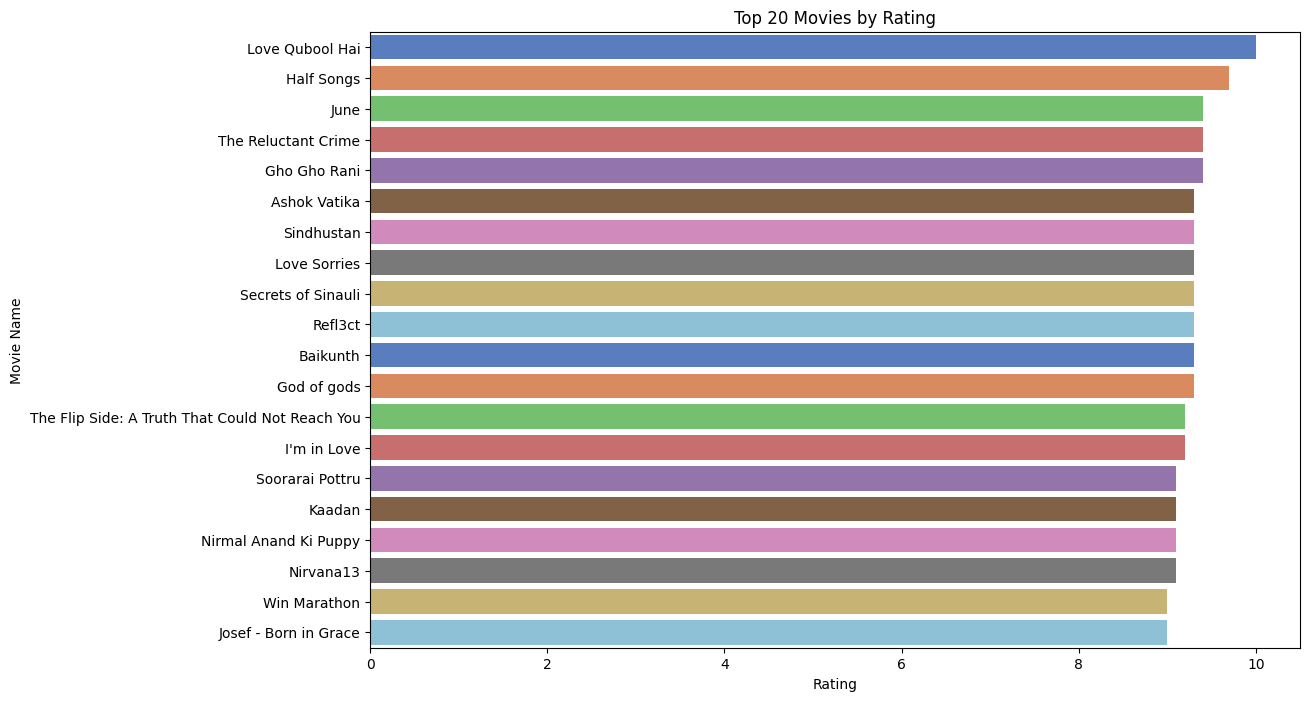

In [ ]:
# plot graph for top 20 movies
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Name', data=top_movies, orient='h', palette='muted')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.title('Top 20 Movies by Rating')
plt.show()

In [ ]:
# Count occurrences of each genre combination
genre_distribution = movie_dataset['Genre'].value_counts().reset_index()
genre_distribution.columns = ['Genre', 'Count']

In [ ]:
# Select the top 5 genre combinations
top_genres = genre_distribution.head(5)

<ipython-input-19-b2e4b4dd1825>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='muted')


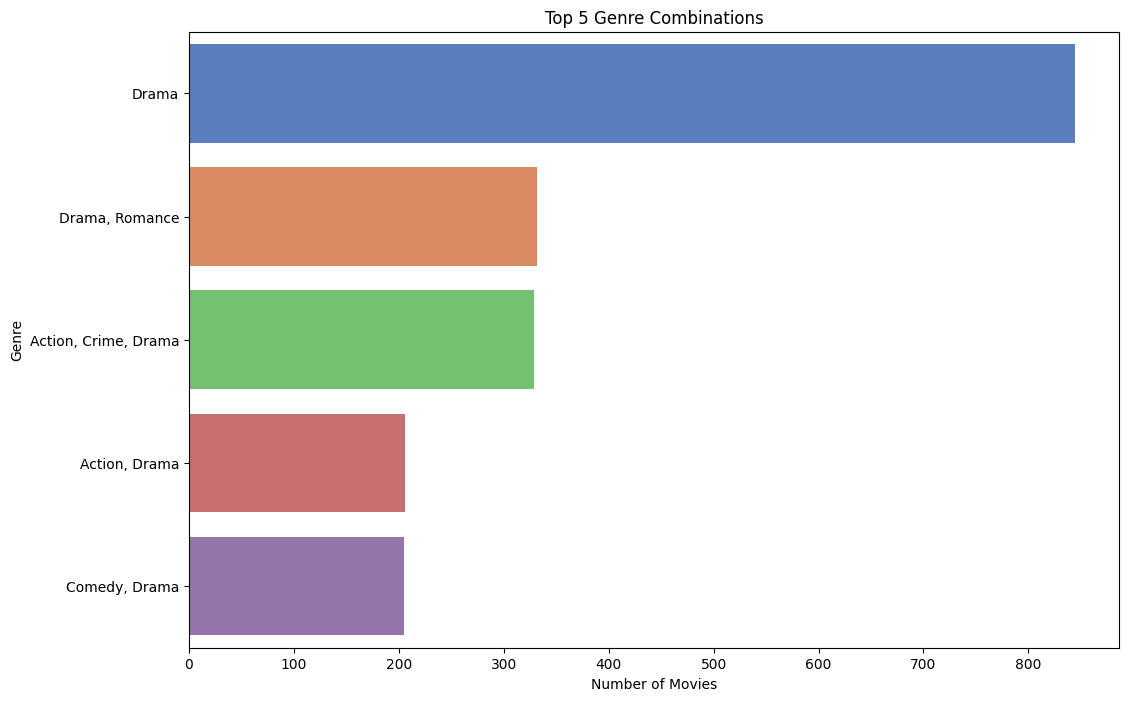

In [ ]:
# Plot the top genre combinations
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='muted')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top 5 Genre Combinations')
plt.show()

In [ ]:
director_distribution = movie_dataset.groupby('Director')['Rating'].mean().reset_index()


In [ ]:
director_distribution = director_distribution.sort_values(by='Rating', ascending=False)

In [ ]:
highest_rating = director_distribution.head(10)
highest_rating

,Director,Rating
1833,Saif Ali Sayeed,10.0
2107,Sriram Raja,9.7
1240,Munni Pankaj,9.4
2142,Suhrud Godbole,9.4
274,Arvind Pratap,9.4
2309,Venkatesh Bk,9.3
1921,Sapna Bhavnani,9.3
2387,Vishwa Bhanu,9.3
1528,Rahul Mallick,9.3
635,Gautam Joshi,9.3


<ipython-input-23-7ad4d7c853ec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Director', data=highest_rating, palette='muted')


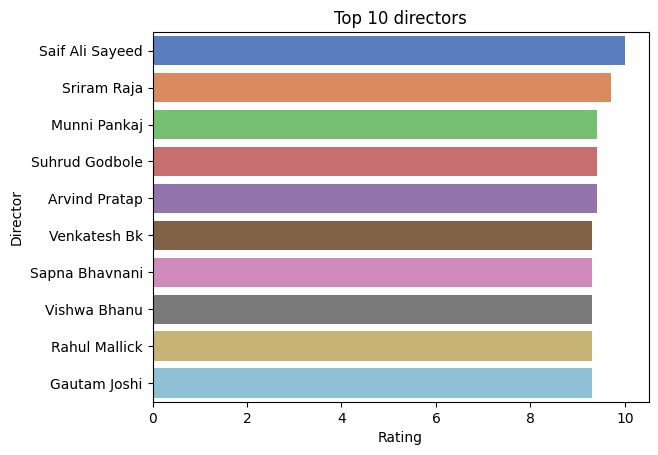

In [ ]:
sns.barplot(x='Rating', y='Director', data=highest_rating, palette='muted')
plt.xlabel('Rating')
plt.ylabel('Director')
plt.title('Top 10 directors')
plt.show()

In [ ]:
# Drop rows with missing ratings
movie_dataset = movie_dataset.dropna(subset=['Rating'])

# Convert the 'Rating' column to numeric
movie_dataset['Rating'] = pd.to_numeric(movie_dataset['Rating'], errors='coerce')

# Define the features and the target variable
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

# Drop rows with missing values in the selected features
movie_dataset = movie_dataset.dropna(subset=features)

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Drop the 'Name' column and apply LabelEncoder transformations
transform_data = movie_dataset.drop(['Name'], axis=1)
transform_data[['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre']] = transform_data[['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre']].apply(
    lambda col: labelencoder.fit_transform(col.astype(str)) if col.name != 'Genre' else labelencoder.fit_transform(col.apply(lambda x: ','.join(str(x).split(', ')))))



In [ ]:
x = transform_data.drop(['Rating'], axis=1)
y= transform_data['Rating']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
# Check for remaining string values in features
print(x_train.dtypes)

# Check if y_train contains string values
print(y_train.dtype)
print(y_train.unique()) # Check for unusual values

# Identify string columns in x_train
string_columns = x_train.select_dtypes(include=['object']).columns

# Apply appropriate encoding to string columns
for col in string_columns:
    # Choose one of the following encoding methods based on the nature of your data:
    # 1. Label Encoding (for ordinal data):
    #   from sklearn.preprocessing import LabelEncoder
    #   le = LabelEncoder()
    #   x_train[col] = le.fit_transform(x_train[col])

    # 2. One-Hot Encoding (for nominal data):
    x_train = pd.get_dummies(x_train, columns=[col])

# Re-train the model after encoding
model.fit(x_train, y_train)

Year        object
Duration    object
Genre        int64
Votes       object
Director     int64
Actor 1      int64
Actor 2      int64
Actor 3      int64
dtype: object
float64
[ 6.1  6.2  3.5  7.1  6.9  4.5  7.   4.6  3.2  7.4  7.8  5.3  6.4  5.7
  6.8  6.5  4.4  7.2  5.2  8.5  6.6  5.5  7.9  6.3  3.6  4.8  4.2  6.
  6.7  3.9  8.   5.6  5.1  2.   7.7  7.3  3.8  7.5  5.8  3.   8.2  4.7
  2.8  5.4  4.   4.9  5.   7.6  5.9  4.1  8.1  3.3  3.7  3.4  2.7  4.3
  1.8  2.6  2.5  2.3  3.1  2.4  8.3  2.9  8.6  8.8  9.   9.3  8.4  1.9
  1.1  1.7  2.1  1.6  9.1  8.9  1.4  8.7  9.4  9.2 10.   2.2  9.7]


LinearRegression()

In [ ]:
x_test = np.array(x_test)

In [ ]:
y_prediction = model.predict(x_test) # Use the correct method name for prediction
y_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.71835774, 5.26626383, 4.64748356, ..., 5.20781458, 6.00524942,
       6.10445753])

In [ ]:
print('R2 score: ',r2_score(y_test, y_prediction))

R2 score:  -0.005245385653922741


In [ ]:
print('Mean Squared error:', mean_squared_error(y_test, y_prediction))

Mean Squared error: 1.841541988208589


In [ ]:
print('Mean absolute error: ', mean_absolute_error(y_test, y_prediction))

Mean absolute error:  1.0612591152750628


In [ ]:
print(y_test)

10971    6.0
14052    2.4
10002    3.8
3970     3.8
8840     7.2
        ... 
3021     8.3
9112     3.4
2240     4.9
1764     5.6
8055     4.5
Name: Rating, Length: 1698, dtype: float64
